In [1]:
%load_ext autoreload
%autoreload 2

from lensit.clusterlens import lensingmap, profile 
import numpy as np 
import camb 

import os
import os.path as op
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import PowerNorm

In [2]:
# We start by intiating CAMB which will give us the relevant cosmology 
cambinifile = 'planck_2018_acc'

pars = camb.read_ini(op.join(op.dirname('/Users/sayan/CMB_WORK/CAMB-1.1.3/inifiles'),  'inifiles', cambinifile + '.ini'))
results = camb.get_results(pars)

In [3]:
# We define here the parameters for the profile of the cluster
M200, z, xmaxn = 2 * 1e14, 0.7, 3
profname = 'nfw'
key = "cluster" # "lss"/"cluster"/"lss_plus_cluster"
profparams={'M200c':M200, 'z':z, 'xmaxn': xmaxn}
hprofile = profile.profile(results, profname)
xmax = xmaxn*hprofile.get_concentration(M200, z)
# Define here the map square patches
npix = 1024  # Number of pixels
lpix_amin = 0.3 # Physical size of a pixel in arcmin (There is bug when <0.2 amin, due to low precision in Cl_TE at )

print("The size of the data patch is %0.1f X %0.1f arcmin central box"%(npix*lpix_amin, npix*lpix_amin))

# Maximum multipole used to generate the CMB maps from the CMB power spectra
# ellmaxsky = 6000 # (bug when ellmax>6300 because of low precision in Cl_TE of CAMB )
ellmaxsky = 6002 

# Set the maximum ell observed in the CMB data maps
ellmaxdat = 4000
ellmindat = 100

# Number of simulated maps 
nsims = 1000

# Set CMB experiment for noise level and beam
cmb_exp='S4_sayan'

# We will cache things in this directory 
libdir = lensingmap.get_cluster_libdir(cambinifile,  profname, key, npix, lpix_amin, ellmaxsky, M200, z, nsims, cmb_exp)
#libdir = op.join(libdir,"trunc")
print(libdir)

The size of the data patch is 307.2 X 307.2 arcmin central box
/Users/sayan/Project_Geneva/modules/lensit_sims/temp/clustermaps/camb_planck_2018_acc/cmbexp_S4_sayan/nfw_profile/lensed_by_cluster/npix1024_lpix_0.3amin_lmaxsky6002/M200_2.000000E+14_z0.7/1000_sims


In [4]:
np.random.seed(seed=20)
clustermaps = lensingmap.cluster_maps(libdir, key, npix, lpix_amin, nsims, results, profparams, profilename=profname,  ellmax_sky = ellmaxsky, ellmax_data=ellmaxdat, ellmin_data=ellmindat, cmb_exp=cmb_exp)

/Users/sayan/Project_Geneva/modules/Sayan_repos/LensIt/lensit/clusterlens/profile.py:144: RuntimeWarning: invalid value encountered in sqrt
  g[xd] = (np.sqrt(xmax**2 - idx**2)/(1+xmax) - 1/np.sqrt(1-idx**2) * np.arccosh((idx**2 + xmax) / (idx * (1+xmax))) )/(idx**2-1)
/Users/sayan/Project_Geneva/modules/Sayan_repos/LensIt/lensit/clusterlens/profile.py:144: RuntimeWarning: invalid value encountered in arccosh
  g[xd] = (np.sqrt(xmax**2 - idx**2)/(1+xmax) - 1/np.sqrt(1-idx**2) * np.arccosh((idx**2 + xmax) / (idx * (1+xmax))) )/(idx**2-1)


/Users/sayan/Project_Geneva/modules/Sayan_repos/LensIt/lensit/clusterlens/profile.py:126: RuntimeWarning: invalid value encountered in sqrt
  f[xd] = (1 - 2/np.sqrt(1 - idx**2) * np.arctanh(np.sqrt((1 - idx)/(1 + idx))))/(idx**2-1)


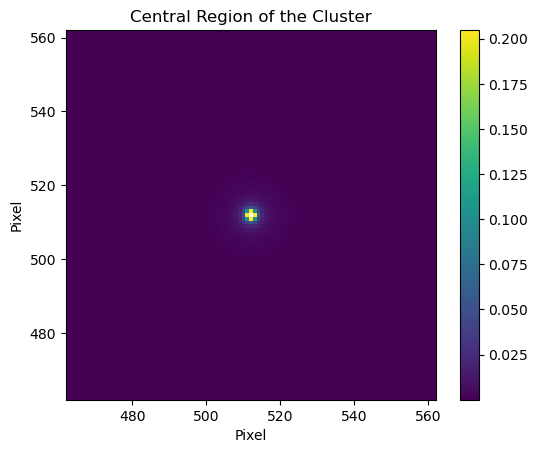

In [5]:
plt.imshow(np.fft.fftshift(clustermaps.get_kappa_map(M200, z)))
plt.colorbar()
plt.xlim(npix//2 - 50, npix//2 + 50)
plt.ylim(npix//2 - 50, npix//2 + 50)
plt.title('Central Region of the Cluster')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.show()

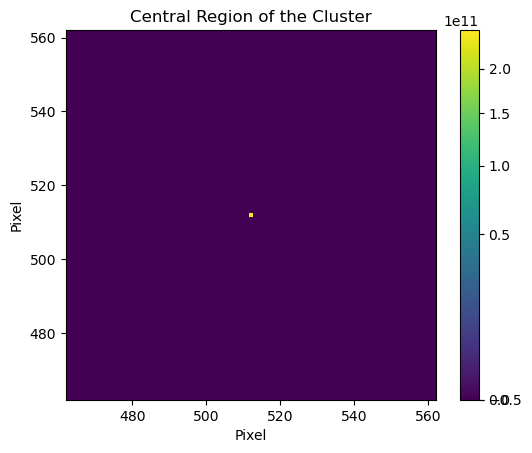

In [6]:
tsz_map = clustermaps.get_tsz_map(M200, z, 150)
# Plot the tSZ map

plt.imshow(np.fft.fftshift(tsz_map), norm=PowerNorm(gamma=0.5))
plt.colorbar()
plt.xlim(npix//2 - 50, npix//2 + 50)
plt.ylim(npix//2 - 50, npix//2 + 50)
plt.title('Central Region of the Cluster')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.show()

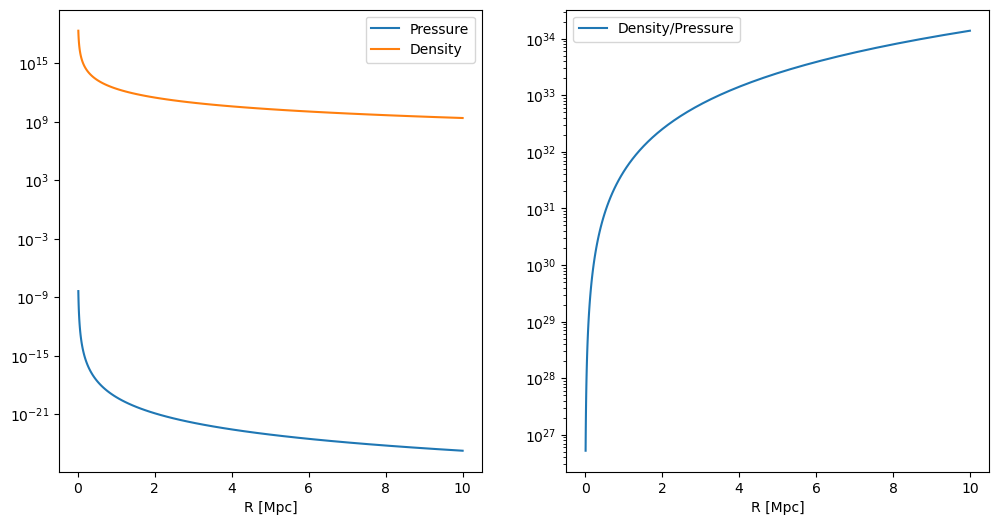

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
R_values = np.logspace(-2, 1, 100)
P_values = hprofile.P_gnfw(M200, z, R_values)
rho_values = hprofile.rho_nfw(M200, z, R_values)
ax1.plot(R_values, P_values, label='Pressure')
ax1.plot(R_values, rho_values, label='Density')
ax1.set_xlabel('R [Mpc]')
ax1.legend()
ax1.semilogy()

ax2.plot(R_values, rho_values / P_values, label='Density/Pressure')
ax2.set_xlabel('R [Mpc]')
ax2.legend()
ax2.semilogy()

plt.show()